In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
from tabulate import tabulate
from prettytable import PrettyTable

In [ ]:
#read dataset into dataframe
df = pd.read_csv("police.csv")

In [ ]:
# Check the first few rows of the dataset
df.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5


In [ ]:
# Check the number of rows and columns in the dataset
print(df.shape)

(65276, 25)


In [ ]:
# Check the data types of the columns
print(df.dtypes)

Arrest_Year                          int64
Arrest_Month                        object
EventID                              int64
ArrestID                           float64
PersonID                             int64
Perceived_Race                      object
Sex                                 object
Age_group__at_arrest_               object
Youth_at_arrest__under_18_years     object
ArrestLocDiv                        object
StripSearch                          int64
Booked                               int64
Occurrence_Category                 object
Actions_at_arrest___Concealed_i      int64
Actions_at_arrest___Combative__      int64
Actions_at_arrest___Resisted__d      int64
Actions_at_arrest___Mental_inst      int64
Actions_at_arrest___Assaulted_o      int64
Actions_at_arrest___Cooperative      int64
SearchReason_CauseInjury           float64
SearchReason_AssistEscape          float64
SearchReason_PossessWeapons        float64
SearchReason_PossessEvidence       float64
ItemsFound 

In [ ]:
# Check for missing values
print(df.isnull().sum())

Arrest_Year                            0
Arrest_Month                           0
EventID                                0
ArrestID                             469
PersonID                               0
Perceived_Race                         4
Sex                                    0
Age_group__at_arrest_                 24
Youth_at_arrest__under_18_years        0
ArrestLocDiv                           0
StripSearch                            0
Booked                                 0
Occurrence_Category                  165
Actions_at_arrest___Concealed_i        0
Actions_at_arrest___Combative__        0
Actions_at_arrest___Resisted__d        0
Actions_at_arrest___Mental_inst        0
Actions_at_arrest___Assaulted_o        0
Actions_at_arrest___Cooperative        0
SearchReason_CauseInjury           57475
SearchReason_AssistEscape          57475
SearchReason_PossessWeapons        57475
SearchReason_PossessEvidence       57475
ItemsFound                         57475
ObjectId        

In [ ]:
#Presume booking took place given strip search took place
df.loc[df['StripSearch'] == 1, 'Booked'] = 1

In [ ]:
df['Age_group__at_arrest_'].value_counts()

Aged 25 to 34 years          20949
Aged 35 to 44 years          16242
Aged 18 to 24 years          10041
Aged 45 to 54 years           9066
Aged 55 to 64 years           4590
Aged 17 years and younger     1681
Aged 17 years and under       1361
Aged 65 years and older        698
Aged 65 and older              624
Name: Age_group__at_arrest_, dtype: int64

In [ ]:
df['Perceived_Race'].value_counts()

White                   27723
Black                   17526
Unknown or Legacy        5056
East/Southeast Asian     4415
South Asian              3613
Middle-Eastern           3237
Indigenous               1934
Latino                   1768
Name: Perceived_Race, dtype: int64

In [ ]:
df['Sex'].value_counts()

M    52650
F    12617
U        9
Name: Sex, dtype: int64

In [ ]:
# combining two columns that both represent 65 and older
df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace({'Aged 65 and older': 'Aged 65 years and older'})
# combining two columns that both represent under 17
df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace({'Aged 17 years and under': 'Aged 17 years and younger'})

In [ ]:
# merge columns and sum cooperative instances
coop = df.groupby(['Arrest_Year', 'Arrest_Month', 'Perceived_Race', 'Sex', 'Age_group__at_arrest_'])['Actions_at_arrest___Cooperative'].sum().reset_index()

# count number of instances for each merged row
Arrests = df.groupby(['Arrest_Year', 'Arrest_Month', 'Perceived_Race', 'Sex', 'Age_group__at_arrest_'])['Actions_at_arrest___Cooperative'].count().reset_index()
Arrests.rename(columns={'Actions_at_arrest___Cooperative': 'Arrests'}, inplace=True)

# merge counts with coop DataFrame
coop = pd.merge(coop, Arrests, on=['Arrest_Year', 'Arrest_Month', 'Perceived_Race', 'Sex', 'Age_group__at_arrest_'])

coop.head()

,Arrest_Year,Arrest_Month,Perceived_Race,Sex,Age_group__at_arrest_,Actions_at_arrest___Cooperative,Arrests
0,2020,Apr-June,Black,F,Aged 17 years and younger,16,36
1,2020,Apr-June,Black,F,Aged 18 to 24 years,30,87
2,2020,Apr-June,Black,F,Aged 25 to 34 years,23,99
3,2020,Apr-June,Black,F,Aged 35 to 44 years,22,52
4,2020,Apr-June,Black,F,Aged 45 to 54 years,6,26


In [ ]:
coop['Perceived_Race'].value_counts()

White                   116
Unknown or Legacy       113
East/Southeast Asian    112
Black                   110
Middle-Eastern          107
South Asian             106
Latino                  101
Indigenous               98
Name: Perceived_Race, dtype: int64

In [ ]:
#Remove unknowns from out dataset 
coop = coop.drop(coop[coop['Perceived_Race'] == 'Unknown or Legacy'].index)

In [ ]:
'''
We calculate the cooperative scores for each race group by dividing the number of cooperative instances by
the total number of arrests for each group, and named the new column 'portion'
'''

coop['portion'] = round(coop['Actions_at_arrest___Cooperative']/coop['Arrests'],2)
coop.head()

,Arrest_Year,Arrest_Month,Perceived_Race,Sex,Age_group__at_arrest_,Actions_at_arrest___Cooperative,Arrests,portion
0,2020,Apr-June,Black,F,Aged 17 years and younger,16,36,0.44
1,2020,Apr-June,Black,F,Aged 18 to 24 years,30,87,0.34
2,2020,Apr-June,Black,F,Aged 25 to 34 years,23,99,0.23
3,2020,Apr-June,Black,F,Aged 35 to 44 years,22,52,0.42
4,2020,Apr-June,Black,F,Aged 45 to 54 years,6,26,0.23


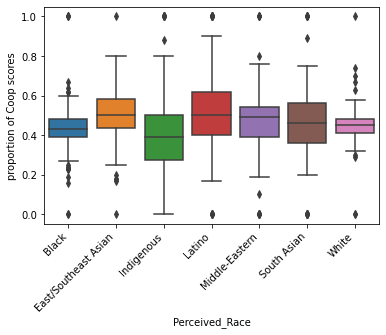

In [ ]:
#Visualise overall pattern between Race groups and cooperativeness 
sns.boxplot(x='Perceived_Race', y='portion', data=coop)
race = coop['Perceived_Race'].unique().tolist()
plt.ylabel('proportion of Coop scores')
plt.xticks(rotation=45)
plt.xticks(range(len(race)), race, ha='right', va='top')
plt.show()

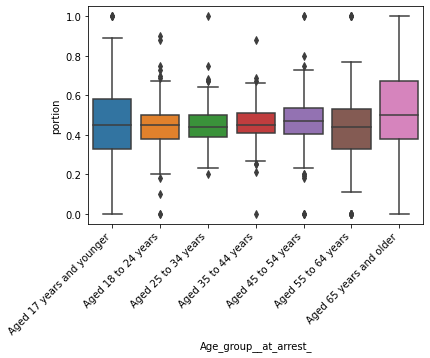

In [ ]:
#Visualise overall pattern between Age groups and cooperativeness 
sns.boxplot(x='Age_group__at_arrest_', y='portion', data=coop)
age = coop['Age_group__at_arrest_'].unique().tolist()
plt.xticks(rotation=45)
plt.xticks(range(len(age)), age, ha='right', va='top')
plt.show()

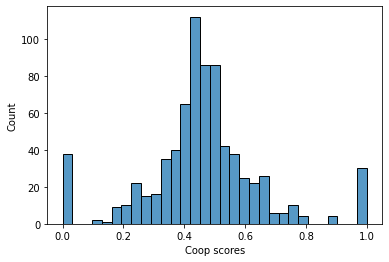

In [ ]:
# Check the distribution of variables
sns.histplot(coop['portion'], kde=False)
plt.ylabel('Count')
plt.xlabel('Coop scores')
plt.show()

In [ ]:
#Calculate summary statistics
summary = coop.groupby('Perceived_Race')['portion'].describe()
print(summary)

                      count      mean       std  min     25%   50%     75%  \
Perceived_Race                                                               
Black                 110.0  0.433818  0.141376  0.0  0.3900  0.43  0.4800   
East/Southeast Asian  112.0  0.504196  0.142662  0.0  0.4375  0.50  0.5825   
Indigenous             98.0  0.411939  0.248163  0.0  0.2750  0.39  0.5000   
Latino                101.0  0.505545  0.242052  0.0  0.4000  0.50  0.6200   
Middle-Eastern        107.0  0.464766  0.195855  0.0  0.3900  0.49  0.5400   
South Asian           106.0  0.457453  0.218122  0.0  0.3600  0.46  0.5600   
White                 116.0  0.448621  0.105393  0.0  0.4100  0.45  0.4800   

                      max  
Perceived_Race             
Black                 1.0  
East/Southeast Asian  1.0  
Indigenous            1.0  
Latino                1.0  
Middle-Eastern        1.0  
South Asian           1.0  
White                 1.0  


In [ ]:
#Making a table for the result
table = PrettyTable()

# Define the column names
table.field_names = ["Perceived_Race", "count", "mean", "std", "min", "25%", "50%", "75%"]

# Add the data rows to the table
table.add_row(["Black", 110, 0.433818, 0.141376, 0.0, 0.3900, 0.43, 0.4800])
table.add_row(["East/Southeast Asian", 112, 0.504196, 0.142662, 0.0, 0.4375, 0.50, 0.5825])
table.add_row(["Indigenous", 98, 0.411939, 0.248163, 0.0, 0.2750, 0.39, 0.5000])
table.add_row(["Latino", 101, 0.505545, 0.242052, 0.0, 0.4000, 0.50, 0.6200])
table.add_row(["Middle-Eastern", 107, 0.464766, 0.195855, 0.0, 0.3900, 0.49, 0.5400])
table.add_row(["South Asian", 106, 0.457453, 0.218122, 0.0, 0.3600, 0.46, 0.5600])
table.add_row(["White", 116, 0.448621, 0.105393, 0.0, 0.4100, 0.45, 0.4800])

# Set the alignment of numeric columns
for field in table.field_names[1:]:
    table.align[field] = "right"

# Print the table
print(table)


+----------------------+-------+----------+----------+-----+--------+------+--------+
|    Perceived_Race    | count |   mean   |   std    | min |  25%   | 50%  |  75%   |
+----------------------+-------+----------+----------+-----+--------+------+--------+
|        Black         |  110  | 0.433818 | 0.141376 | 0.0 |  0.39  | 0.43 |  0.48  |
| East/Southeast Asian |  112  | 0.504196 | 0.142662 | 0.0 | 0.4375 | 0.5  | 0.5825 |
|      Indigenous      |   98  | 0.411939 | 0.248163 | 0.0 | 0.275  | 0.39 |  0.5   |
|        Latino        |  101  | 0.505545 | 0.242052 | 0.0 |  0.4   | 0.5  |  0.62  |
|    Middle-Eastern    |  107  | 0.464766 | 0.195855 | 0.0 |  0.39  | 0.49 |  0.54  |
|     South Asian      |  106  | 0.457453 | 0.218122 | 0.0 |  0.36  | 0.46 |  0.56  |
|        White         |  116  | 0.448621 | 0.105393 | 0.0 |  0.41  | 0.45 |  0.48  |
+----------------------+-------+----------+----------+-----+--------+------+--------+


Research Question 
"Is there a statistically significant difference in cooperativeness between different race groups? Which race group exhibit the highest level of cooperativeness?"

In [ ]:
# separate the cooperative scores by selected race group
black = coop.loc[coop['Perceived_Race'] == 'Black', 'portion']
latino = coop.loc[coop['Perceived_Race'] == 'Latino', 'portion']
indigenous = coop.loc[coop['Perceived_Race'] == 'Indigenous', 'portion']
white = coop.loc[coop['Perceived_Race'] == 'White', 'portion']

# perform t-test for each pair of race groups
t_stat, p_val = ttest_ind(latino, indigenous, equal_var=False)
print("Welch's t-test for Latino vs Indigenous:")
print("t-statistic: {:.3f}".format(t_stat))
print("p-value: {:.3f}".format(p_val))

t_stat, p_val = ttest_ind(black, indigenous, equal_var=False)
print("Welch's t-test for Black vs Indigenous:")
print("t-statistic: {:.3f}".format(t_stat))
print("p-value: {:.3f}".format(p_val))

t_stat, p_val = ttest_ind(white, indigenous, equal_var=False)
print("Welch's t-test for White vs Indigenous:")
print("t-statistic: {:.3f}".format(t_stat))
print("p-value: {:.3f}".format(p_val))

t_stat, p_val = ttest_ind(white, latino, equal_var=False)
print("Welch's t-test for White vs latino:")
print("t-statistic: {:.3f}".format(t_stat))
print("p-value: {:.3f}".format(p_val))

t_stat, p_val = ttest_ind(black, latino, equal_var=False)
print("Welch's t-test for black vs latino:")
print("t-statistic: {:.3f}".format(t_stat))
print("p-value: {:.3f}".format(p_val))



Welch's t-test for Latino vs Indigenous:
t-statistic: 2.693
p-value: 0.008
Welch's t-test for Black vs Indigenous:
t-statistic: 0.769
p-value: 0.443
Welch's t-test for White vs Indigenous:
t-statistic: 1.363
p-value: 0.175
Welch's t-test for White vs latino:
t-statistic: -2.190
p-value: 0.030
Welch's t-test for black vs latino:
t-statistic: -2.599
p-value: 0.010


In [ ]:
#Perform one-way ANOVA
model = ols('portion ~ Perceived_Race', data=coop).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                   sum_sq     df         F    PR(>F)
Perceived_Race   0.747156    6.0  3.477071  0.002137
Residual        26.609411  743.0       NaN       NaN


In [ ]:
#Making a table for the result
#define the data in a list of lists
data = [
    ['Perceived_Race', 0.747156, 6.0, 3.477071, 0.002137],
    ['Residual', 26.609411, 743.0, '', '']
]

# define the headers for the table
headers = ['Source', 'Sum of Squares', 'Degrees of Freedom', 'F-statistic', 'p-value']

# use tabulate to create the table and print it
print(tabulate(data, headers=headers, tablefmt='fancy_grid'))


╒════════════════╤══════════════════╤══════════════════════╤═══════════════╤═══════════╕
│ Source         │   Sum of Squares │   Degrees of Freedom │ F-statistic   │ p-value   │
╞════════════════╪══════════════════╪══════════════════════╪═══════════════╪═══════════╡
│ Perceived_Race │         0.747156 │                    6 │ 3.477071      │ 0.002137  │
├────────────────┼──────────────────┼──────────────────────┼───────────────┼───────────┤
│ Residual       │        26.6094   │                  743 │               │           │
╘════════════════╧══════════════════╧══════════════════════╧═══════════════╧═══════════╛


In [ ]:
# Conduct Tukey's HSD test
tukey_results = sm.stats.multicomp.pairwise_tukeyhsd(coop['portion'], coop['Perceived_Race'])
# Print the results
print(tukey_results.summary())

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
               Black East/Southeast Asian   0.0704 0.0834 -0.0047  0.1455  False
               Black           Indigenous  -0.0219    0.9 -0.0996  0.0558  False
               Black               Latino   0.0717 0.0875 -0.0054  0.1488  False
               Black       Middle-Eastern   0.0309 0.8908  -0.045  0.1069  False
               Black          South Asian   0.0236    0.9 -0.0525  0.0998  False
               Black                White   0.0148    0.9 -0.0597  0.0893  False
East/Southeast Asian           Indigenous  -0.0923 0.0082 -0.1696 -0.0149   True
East/Southeast Asian               Latino   0.0013    0.9 -0.0754  0.0781  False
East/Southeast Asian       Middle-Eastern  -0.0394 0.6932 -0.1151  0.0362  False
East/Southeast Asian        